# Soluções para os desafios propostos nas aulas do #QuarentenaDados.

# Aula 1

## Preparativos

In [0]:
import pandas as pd

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [5]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [6]:
filmes_com_media["nota"].isna().sum()

18

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [7]:
filmes_com_media.columns

Index(['filmeId', 'titulo', 'generos', 'nota'], dtype='object')

In [8]:
filmes_com_media.rename(columns={"nota": "nota_media"}, inplace=True)
filmes_com_media.columns

Index(['filmeId', 'titulo', 'generos', 'nota_media'], dtype='object')

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [9]:
total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
total_votos_por_filme

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [10]:
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'nota': 'total_votos'})
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [11]:
filmes_com_media_e_votos["nota_media"] = filmes_com_media_e_votos["nota_media"].round(2)
filmes_com_media_e_votos

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [12]:
#generos_series = filmes_com_media_e_votos["generos"].apply(lambda string: pd.value_counts(string.split("|"))).sum(axis=0)
generos_df = filmes_com_media_e_votos["generos"].str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [13]:
total_filmes_por_genero = filmes_com_media_e_votos["generos"].str.get_dummies().sum()
total_filmes_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

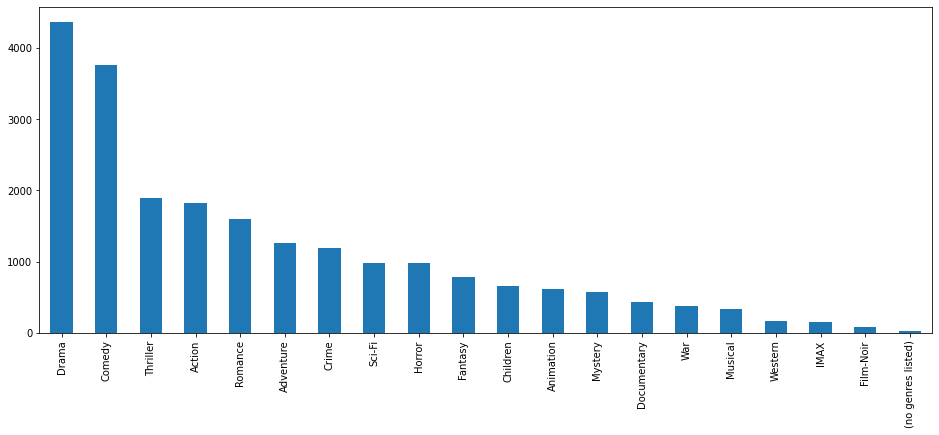

In [14]:
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6));

# Aula 2

## Preparativos

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
filmes_por_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

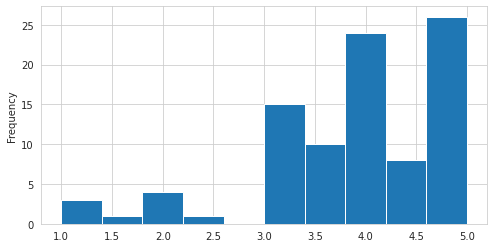

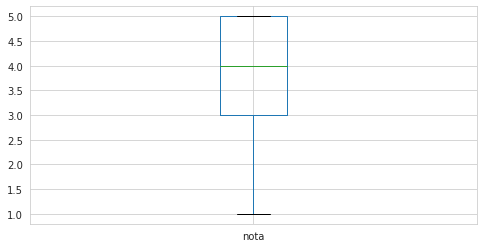


Describe:


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [17]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind="hist", figsize=(8,4))
  plt.show()
  print("\n")
  notas_do_filme.plot.box(figsize=(8,4))
  plt.show()
  print("\nDescribe:")
  return notas_do_filme.describe()

plot_filme(919)

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos gêneros) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

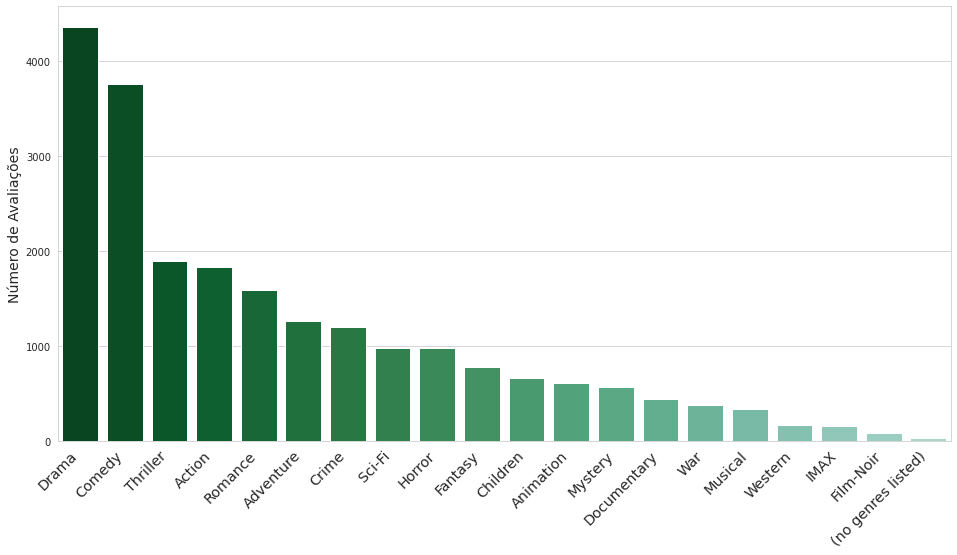

In [18]:
plt.figure(figsize=(16,8))

chart = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+10))

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment="right",
    fontweight="light",
    fontsize="x-large"
)

plt.ylabel("Número de Avaliações", fontsize=14)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontrar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filme(n)** para plotar.

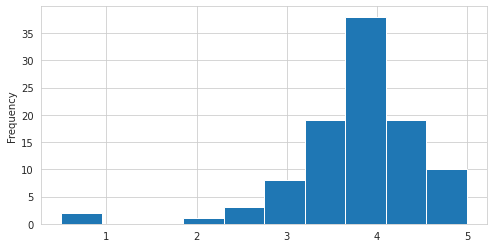

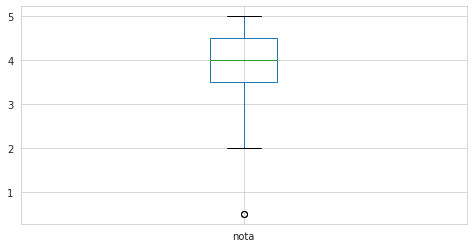


Describe:


count    100.000000
mean       3.885000
std        0.787705
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [19]:
plot_filme(44191) # V de Vingança

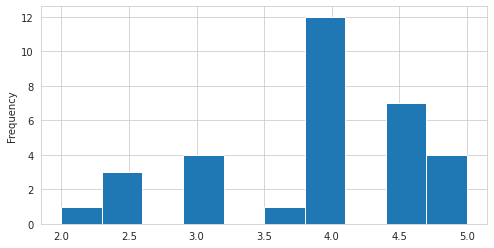

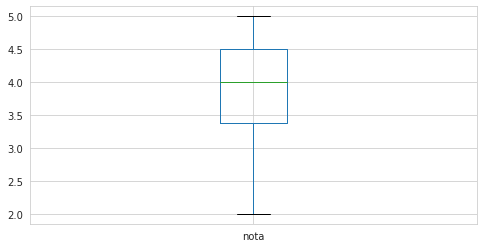


Describe:


count    32.000000
mean      3.890625
std       0.810559
min       2.000000
25%       3.375000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [20]:
plot_filme(152081) # Zootopia

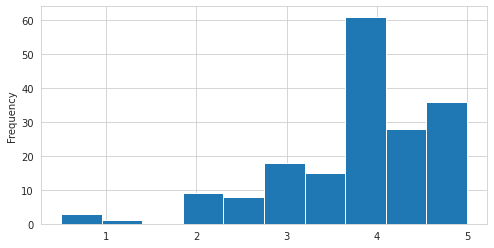

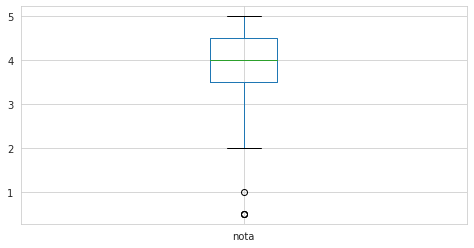


Describe:


count    179.000000
mean       3.893855
std        0.955420
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [21]:
plot_filme(2762) # Sexto Sentido

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [22]:
top_filmes_mais_votados = filmes_com_media_e_votos.sort_values(by="total_votos", ascending=False).head(10)
top_filmes_mais_votados.head()

,filmeId,titulo,generos,nota_media,total_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0


In [23]:
avaliacoes_com_titulo_filme = avaliacoes.merge(filmes_com_media_e_votos, on="filmeId")
avaliacoes_com_titulo_filme.head()

,usuarioId,filmeId,nota,momento,titulo,generos,nota_media,total_votos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0


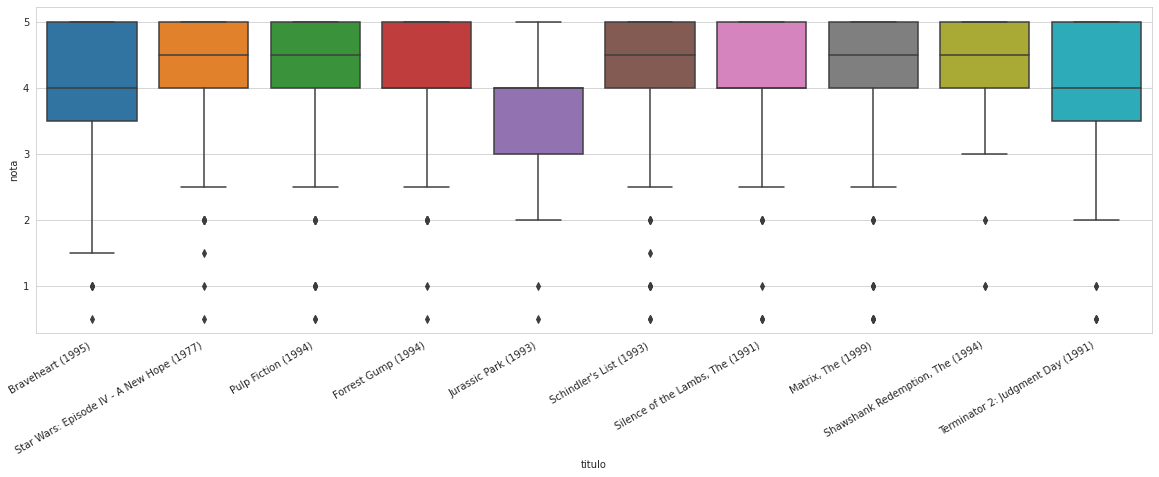

In [24]:
filmeId_top_filmes = list(top_filmes_mais_votados["filmeId"].values)

plt.figure(figsize=(20,6))
chart = sns.boxplot(data=avaliacoes_com_titulo_filme.query(f"filmeId in {filmeId_top_filmes}"), x="titulo", y="nota")

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=30, 
    horizontalalignment="right"
)

plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

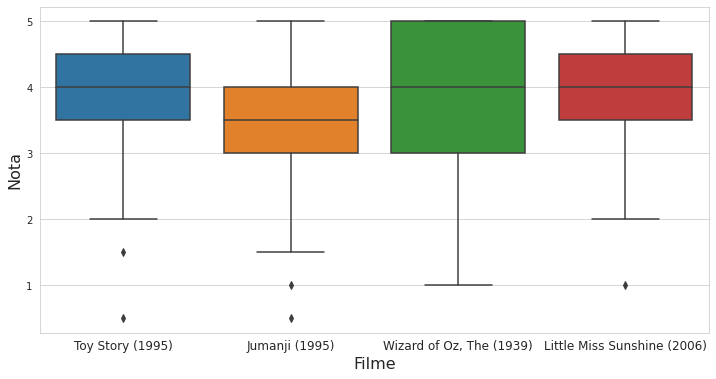

In [25]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def explora_filme(filme_id):
    filme = filmes.query(f"filmeId == {filme_id}")
    notas = avaliacoes.query(f"filmeId == {filme_id}")["nota"]
    
    print(f"Filme: {filme.iloc[0, 1]}")
    print(f"Moda: {round(notas.mode()[0], 2)}")
    print(f"Média: {round(notas.mean(), 2)}")
    print(f"Mediana: {round(notas.median(), 2)}")
    print('------------')

In [27]:
explora_filme(44191)
explora_filme(152081)
explora_filme(2762)

Filme: V for Vendetta (2006)
Moda: 4.0
Média: 3.88
Mediana: 4.0
------------
Filme: Zootopia (2016)
Moda: 4.0
Média: 3.89
Mediana: 4.0
------------
Filme: Sixth Sense, The (1999)
Moda: 4.0
Média: 3.89
Mediana: 4.0
------------


In [28]:
explora_filme(102084)
explora_filme(99636)
explora_filme(146684)

Filme: Justice League: Doom (2012) 
Moda: 5.0
Média: 5.0
Mediana: 5.0
------------
Filme: English Vinglish (2012)
Moda: 5.0
Média: 5.0
Mediana: 5.0
------------
Filme: Cosmic Scrat-tastrophe (2015)
Moda: 5.0
Média: 5.0
Mediana: 5.0
------------


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


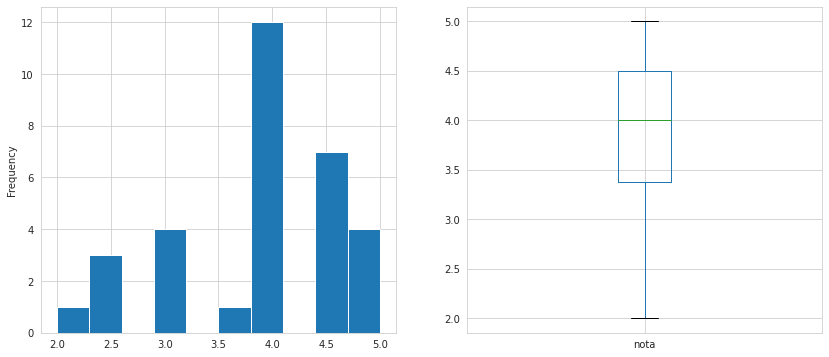

In [29]:
sexto_sentido = avaliacoes_com_titulo_filme.query('filmeId == 152081')['nota']

f, axes = plt.subplots(1, 2, figsize=(14,6))

sexto_sentido.plot(kind='hist', ax=axes[0])
sexto_sentido.plot(kind='box', ax=axes[1])

plt.show()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [30]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano["ano"] = filmes_com_media["titulo"].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


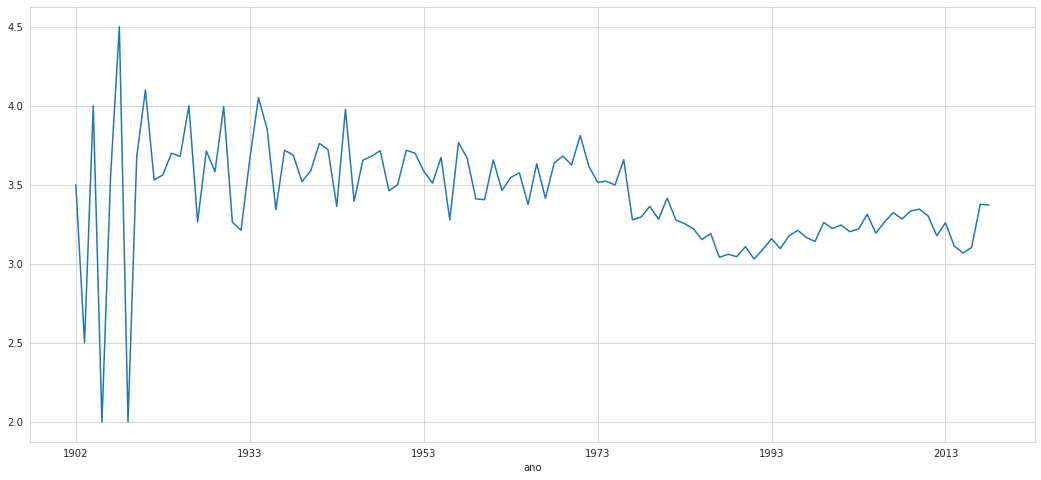

In [31]:
nota_media_por_ano = filmes_com_media_e_ano.groupby("ano")["nota_media"].mean()

plt.figure(figsize=(18,8))
nota_media_por_ano.plot()
plt.show()

# Aula 3

## Preparativos

In [32]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [33]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [34]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [35]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [36]:
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]
imdb_usa.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [37]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

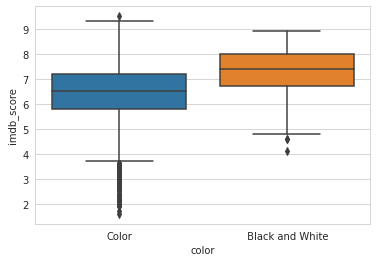

In [38]:
sns.boxplot(x="color", y="imdb_score", data=color_or_bw)

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

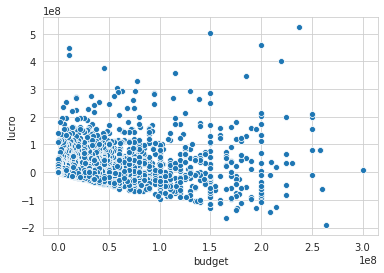

In [39]:
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data=budget_gross)

In [40]:
imdb_usa.sort_values(by="lucro", ascending=True).head(1)[["director_name", "movie_title", "title_year"]]

,director_name,movie_title,title_year
5,Andrew Stanton,John Carter,2012.0


##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [41]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(20)[["director_name", "movie_title", "title_year", "lucro"]]

,director_name,movie_title,title_year,lucro
163,Alex Proyas,Gods of Egypt,2016.0,-108858926.0
2549,Cyrus Nowrasteh,The Young Messiah,2016.0,-12037424.0
2404,Kirk Jones,My Big Fat Greek Wedding 2,2016.0,41573085.0
244,Cedric Nicolas-Troyan,The Huntsman: Winter's War,2016.0,-67047980.0
1742,Ben Falcone,The Boss,2016.0,34034755.0
73,David Ayer,Suicide Squad,2016.0,-13912817.0
150,Paul Feig,Ghostbusters,2016.0,-25900341.0
154,Alessandro Carloni,Kung Fu Panda 3,2016.0,-1476537.0
65,Bryan Singer,X-Men: Apocalypse,2016.0,-23014913.0
567,Clay Kaytis,The Angry Birds Movie,2016.0,34225164.0


In [42]:
lucro_prejuizo = imdb_usa.query("budget > 0 and gross > 0")
lucro_prejuizo["lucro_ou_prejuizo"] = (lucro_prejuizo["lucro"] >= 0) * 1
lucro_prejuizo["lucro_ou_prejuizo"].value_counts() / lucro_prejuizo["lucro_ou_prejuizo"].shape[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    0.573351
0    0.426649
Name: lucro_ou_prejuizo, dtype: float64

Observamos que 57% dos filmes mais recentes obtiveram lucro. Portanto, esses filmes tiveram sim tempo de recuperar o investimento.

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [43]:
imdb_usa.query("lucro > 0 and title_year <= 1939").sort_values(by="lucro", ascending=False).head(10)[["director_name", "movie_title", "title_year", "lucro"]]

,director_name,movie_title,title_year,lucro
3970,Victor Fleming,Gone with the Wind,1939.0,194678278.0
4449,William Cottrell,Snow White and the Seven Dwarfs,1937.0,182925485.0
4157,Victor Fleming,The Wizard of Oz,1939.0,19402612.0
4958,Harry F. Millarde,Over the Hill to the Poorhouse,1920.0,2900000.0
4812,Harry Beaumont,The Broadway Melody,1929.0,2429000.0
4706,Mark Sandrich,Top Hat,1935.0,2391000.0
4786,Lloyd Bacon,42nd Street,1933.0,1861000.0


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

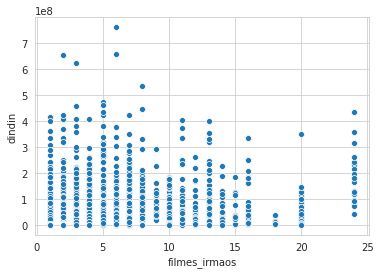

In [44]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data=gross_director);

In [45]:
gross_director[(gross_director["filmes_irmaos"] > 16) & (gross_director["filmes_irmaos"] < 20)]

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


In [46]:
gross_director.drop_duplicates("director_name").query("filmes_irmaos == 18")

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

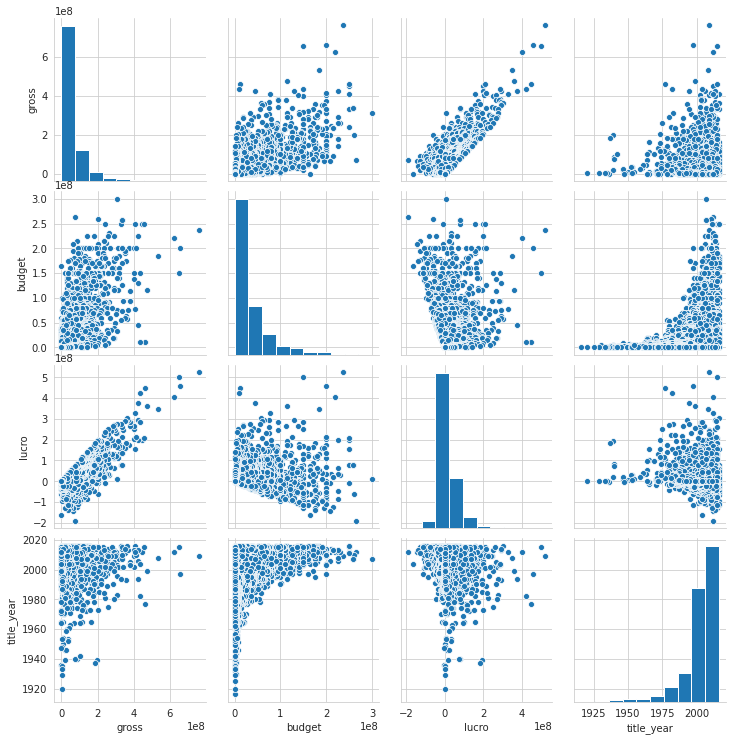

In [47]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [48]:
filmes_depois_de_2000 = imdb_usa.query("title_year >= 2000")
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


Em comparação à correlação anterior vista, para os filmes de depois de 2000 a correlação entre gross-budget e budget-lucro aumentou enquanto entre gross-lucro diminuiu, todos com pequenas margens de diferenças.

Olhando para budget-lucro, foi um aumento pequeno no valor da correlação desses filmes do imdb, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem semelhante.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

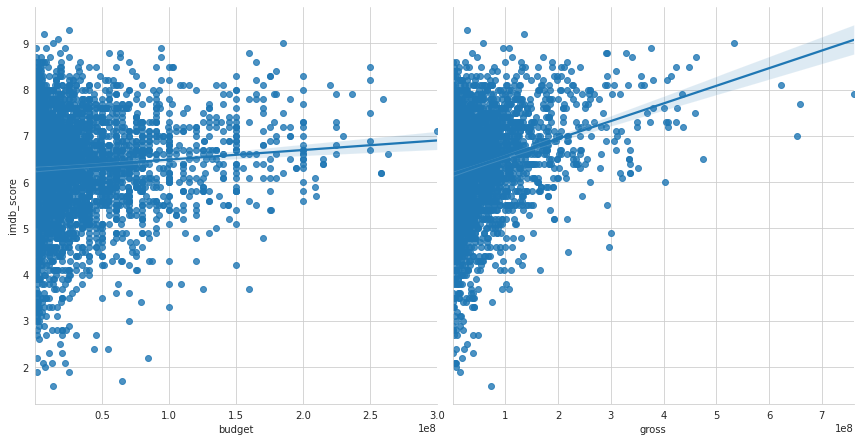

In [49]:
sns.pairplot(imdb_usa, y_vars="imdb_score", x_vars=["budget", "gross"], height=6, kind="reg");

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [50]:
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year", "imdb_score"]].corr()

,gross,budget,lucro,title_year,imdb_score
gross,1.000000,0.709233,0.770642,0.105342,0.249020
budget,0.709233,1.000000,0.097307,0.058550,0.175561
lucro,0.770642,0.097307,1.000000,0.035039,0.243532
title_year,0.105342,0.058550,0.035039,1.000000,-0.012229
imdb_score,0.249020,0.175561,0.243532,-0.012229,1.000000


In [51]:
filmes_depois_de_2000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [52]:
numero_avaliacoe_por_ano = imdb_usa.groupby("title_year")["num_voted_users"].sum()
numero_avaliacoe_por_ano

title_year
1916.0       10718
1920.0           5
1925.0        4849
1929.0        4546
1930.0        3753
            ...   
2012.0    19862275
2013.0    19853223
2014.0    16064163
2015.0     9901600
2016.0     2926518
Name: num_voted_users, Length: 90, dtype: int64

# Aula 4

## Preparativos

In [53]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = "{:,.2f}".format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [54]:
# Dados do dicionário do ENEM
faltou = 0
presente = 1
eliminado = 2

dados_nota = dados.copy()

dados_nota.loc[dados['TP_PRESENCA_CN'].isin([faltou, eliminado]), 'NU_NOTA_CN'] = 0 # dados[dados['TP_PRESENCA_CN'] == presente]['NU_NOTA_CN'].mean()
dados_nota.loc[dados['TP_PRESENCA_CH'].isin([faltou, eliminado]), 'NU_NOTA_CH'] = 0
dados_nota.loc[dados['TP_PRESENCA_LC'].isin([faltou, eliminado]), 'NU_NOTA_LC'] = 0
dados_nota.loc[dados['TP_PRESENCA_MT'].isin([faltou, eliminado]), 'NU_NOTA_MT'] = 0

dados_nota[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

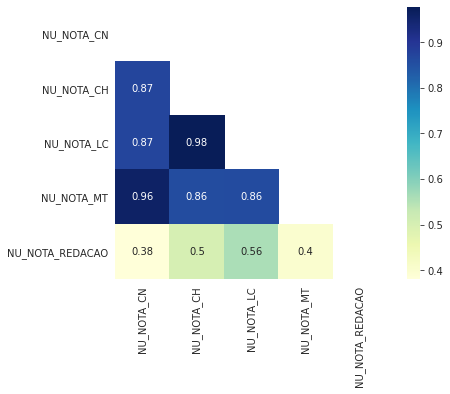

In [55]:
import numpy as np

corr = dados_nota[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True, square=True)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a == b for a, b in zip(respostas, gabarito))

In [0]:
dados_nota_2 = dados_nota.copy()

#dados_nota_2.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'], inplace=True)

dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2.apply(conta_acertos, materia='CN', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2.apply(conta_acertos, materia='CH', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2.apply(conta_acertos, materia='LC', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2.apply(conta_acertos, materia='MT', axis=1)

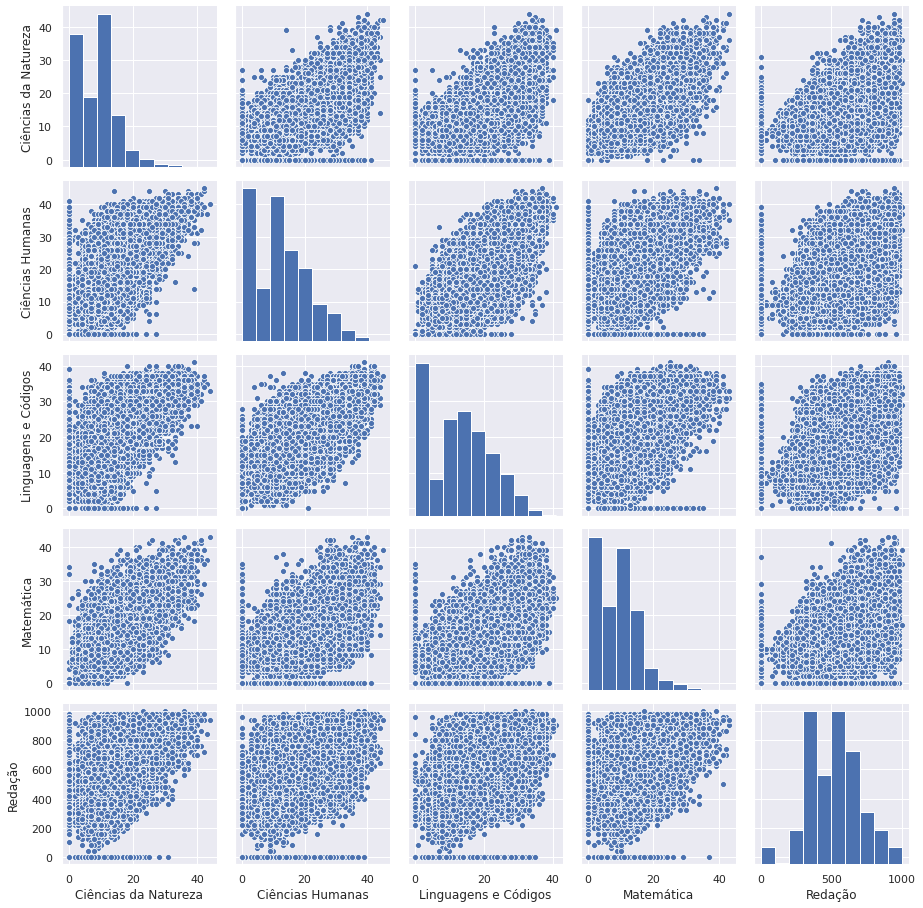

In [58]:
num_questoes_acertadas = dados_nota_2[['NU_RESPOSTAS_CORRETAS_CN', 'NU_RESPOSTAS_CORRETAS_CH', 'NU_RESPOSTAS_CORRETAS_LC', 'NU_RESPOSTAS_CORRETAS_MT', 'NU_NOTA_REDACAO']]
num_questoes_acertadas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.set()
sns.pairplot(num_questoes_acertadas)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [59]:
dados_nota_sem_0 = dados_nota_2.copy()

# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'].replace(0, None)

dados_nota_sem_0['NU_NOTA_CN'] = dados_nota_2['NU_NOTA_CN'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_CH'] = dados_nota_2['NU_NOTA_CH'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_LC'] = dados_nota_2['NU_NOTA_LC'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_MT'] = dados_nota_2['NU_NOTA_MT'].replace(0., np.NAN)

dados_nota_sem_0.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

dados_nota_sem_0[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
6,428.50,505.20,521.00,436.80
8,491.80,575.70,524.40,487.60


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [61]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


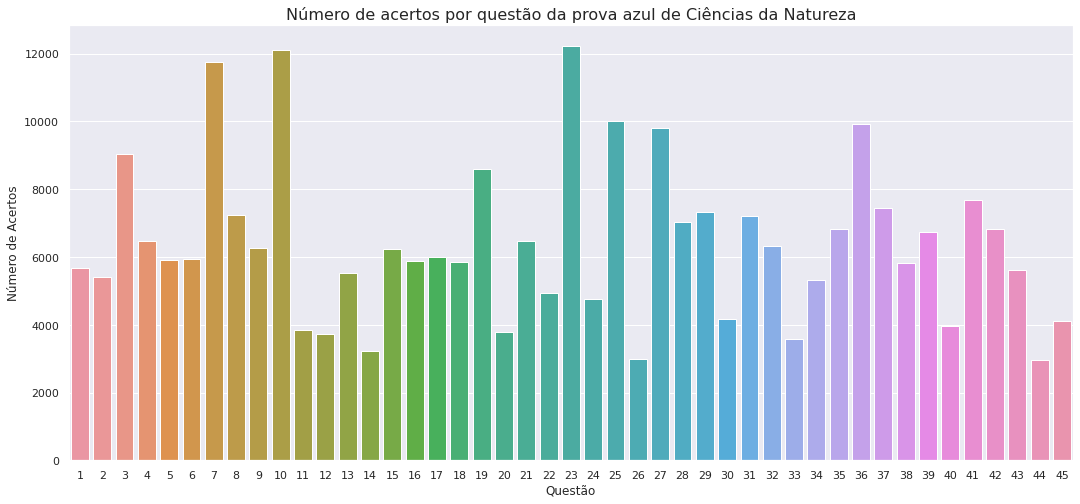

In [62]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

# Aula 5

## Preparativos

In [63]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [64]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [65]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [67]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

modelo = LinearSVR(C=0.5, max_iter=2000)
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_notas_linguagem)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4949.27

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Use a média das notas das 4 provas como input do input e plote um gráfico com a previsão e valores reais (Igual ao gráfico sugerido pelo Allan em aula)

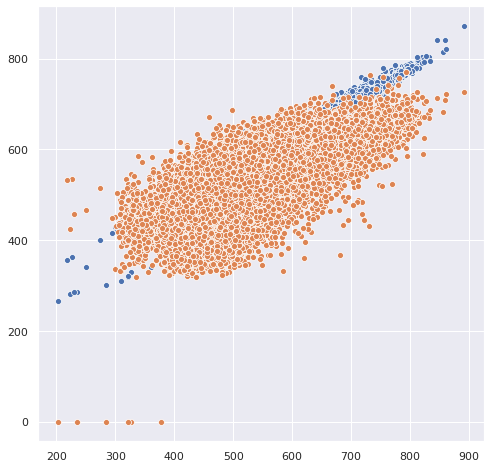

In [68]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=x_teste.mean(axis=1), y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste.mean(axis=1), y=y_teste.values)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [69]:
dados_nota_sem_0.sample(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,NU_RESPOSTAS_CORRETAS_CN,NU_RESPOSTAS_CORRETAS_CH,NU_RESPOSTAS_CORRETAS_LC,NU_RESPOSTAS_CORRETAS_MT
71834,180009962607,2018,1721000,Palmas,17,TO,21.00,F,0.00,1,1,"1,721,000.00",Palmas,17.00,TO,1,1,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.00,120.00,140.00,120.00,140.00,80.00,600.00,H,E,F,B,2,C,A,C,C,A,A,C,A,A,A,A,A,A,B,B,A,C,A,A,A,A,A,12,9,10,11
37230,180007921723,2018,5217609,Planaltina,52,GO,30.00,F,2.00,2,1,"2,903,102.00",Barra do Rocha,29.00,BA,1,11,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,160.00,120.00,120.00,80.00,600.00,B,D,B,B,4,D,A,B,D,B,A,B,A,A,A,B,A,A,B,B,A,D,A,B,B,A,A,7,19,13,10
57999,180009105504,2018,2704302,Maceió,27,AL,18.00,F,0.00,3,1,"2,704,302.00",Maceió,27.00,AL,2,0,2,1.00,0,"27,038,637.00","2,704,302.00",Maceió,27.00,AL,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,120.00,40.00,40.00,140.00,40.00,380.00,B,C,C,B,4,B,D,B,B,A,A,B,B,B,A,B,A,A,B,B,A,E,A,A,B,B,A,8,10,11,8
11716,180008205482,2018,3505708,Barueri,35,SP,18.00,F,0.00,1,1,"3,550,308.00",São Paulo,35.00,SP,2,0,4,1.00,0,"35,142,281.00","3,505,708.00",Barueri,35.00,SP,4.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,140.00,120.00,140.00,100.00,660.00,F,F,D,D,6,O,A,E,E,C,A,C,C,C,B,B,B,B,E,B,B,E,B,C,B,B,E,10,19,20,10
110546,180007782647,2018,3152501,Pouso Alegre,31,MG,22.00,F,0.00,1,1,"3,152,501.00",Pouso Alegre,31.00,MG,1,5,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,160.00,160.00,140.00,160.00,160.00,780.00,C,E,D,D,4,G,A,C,D,B,A,B,A,B,B,B,A,A,B,B,A,C,A,B,B,A,C,22,22,21,16
92829,180008210059,2018,3549904,São José dos Campos,35,SP,17.00,F,0.00,1,1,"3,549,904.00",São José dos Campos,35.00,SP,2,0,2,1.00,0,"35,013,523.00","3,549,904.00",São José dos Campos,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.00,120.00,40.00,40.00,120.00,40.00,360.00,C,E,D,B,5,E,A,C,D,B,A,B,B,B,B,B,A,A,D,B,B,E,B,B,B,B,B,7,11,7,4
67811,180008960127,2018,4125704,São Miguel do Iguaçu,41,PR,20.00,F,0.00,3,1,"4,125,704.00",São Miguel do Iguaçu,41.00,PR,2,0,2,1.00,0,"41,078,900.00","4,125,704.00",São Miguel do Iguaçu,41.00,PR,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.00,120.00,40.00,40.00,100.00,40.00,340.00,B,A,C,A,7,B,A,B,C,A,A,B,A,B,B,A,A,A,B,A,A,B,A,A,B,B,A,8,12,10,8
59886,180008274888,2018,1302603,Manaus,13,AM,30.00,F,0.00,2,1,"1,304,104.00",Tapauá,13.00,AM,1,12,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,

In [70]:
dados_nota_sem_0 = dados_nota_sem_0[colunas_de_notas]
dados_nota_sem_0.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

x_4_notas_2 = dados_nota_sem_0[['ciencias_naturais',
                     'ciencias_humanas',
                     'matematica',
                     'redacao']]


y_adivinhar_2 = dados_nota_sem_0['linguagem_codigo']

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas_2, y_adivinhar_2)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72870, 4)
(24291, 4)
(72870,)
(24291,)


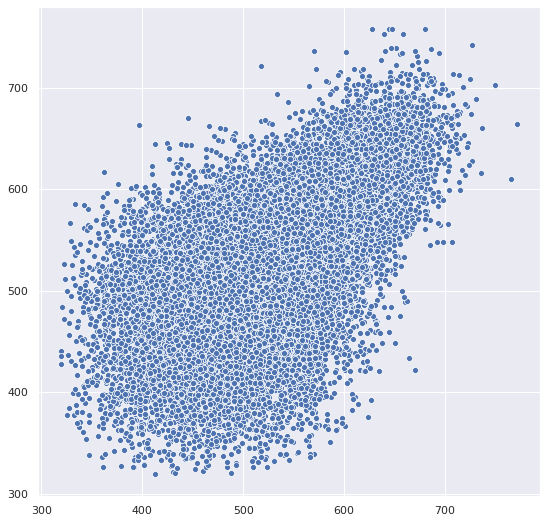

In [71]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem_sem_0 = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem_sem_0)

In [72]:
mean_squared_error(y_teste, predicoes_notas_linguagem_sem_0)

4068.51

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

Nessa aula foi demonstrado como utilizar Scikit-Learn para Regressão. O intuito era conseguir prever a nota do aluno de uma matéria do ENEM a partir da nota de outras matérias (da mesma prova). Com os resultados obtidos, podemos concluir que os resultados não foram satisfatórios. Necessário mais estudo para chegar a resultados melhores.

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [73]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_treino)  
mean_squared_error(y_treino, predicoes_notas_linguagem)

0.00